Read CSV file. Transform datatypes

In [875]:
import pandas as pd
import re

dataset = pd.read_csv('Real estate.csv')
dataset.head(10)
dataset.dtypes

def transform_column_to_float(df, column_name):
    # Make a copy of the DataFrame
    df_transformed = df.copy()
    
    # Iterate over each row and transform the column to a float
    for index, row in df_transformed.iterrows():
        try:
            # Try to convert the value in the column to a float
            df_transformed.at[index, column_name] = float(row[column_name])
        except ValueError:
            # If the value can't be converted to a float, drop the row
            df_transformed.drop(index, inplace=True)
    
    # Return the transformed DataFrame
    return df_transformed


dataset['latitude'] = pd.to_numeric(dataset['latitude'], errors='coerce')
dataset.dropna(inplace=True)
dataset.info
dataset.dtypes
# dataset.head(10)


No                                       int64
transaction date                       float64
house age                              float64
distance to the nearest MRT station    float64
number of convenience stores             int64
latitude                               float64
longitude                              float64
house price of unit area               float64
dtype: object

Transform and parse Dates

In [876]:
def transform_column_to_date(df, column_name):
    df_transformed = df.copy()
    
 
    for index, row in df_transformed.iterrows():
   
        string_float = str(row[column_name])
        parts = string_float.split('.')
        year = parts[0]
        after_dot = parts[1]

        if after_dot:
            after_dot = '0.' + after_dot
        else:
            after_dot = '0.1'

        month = int(float(after_dot)/0.083)
        if month == 0:
            month = 1
        # Create a date string in the format 'YYYY-MM-DD'
        date_str = str(year)+'.'+str(month)
        
        # Convert the date string to a datetime object
        date = pd.to_datetime(date_str)
        
        # Save the transformed date to the DataFrame
        df_transformed.at[index, 'date'] = date
    
    # Return the transformed DataFrame
    return df_transformed

dataset = transform_column_to_date(dataset, 'transaction date')
dataset.head(10)

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area,date
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012-11-01
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012-11-01
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013-07-01
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013-06-01
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012-10-01
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1,2012-08-01
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3,2012-08-01
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7,2013-05-01
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8,2013-06-01
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1,2013-05-01


Re arrange Columns

In [877]:
dataset = dataset.reindex(
                            columns=['No',
                                    'date',
                                    'transaction date',
                                    'house age',
                                    'distance to the nearest MRT station',
                                    'number of convenience stores',
                                    'latitude',
                                    'longitude',
                                    'house price of unit area',
                                    ])

dataset.head(10)
# dataset.dtypes
# "Transaction date" Column can be dropped but I won't do it

,No,date,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012-11-01,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012-11-01,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013-07-01,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013-06-01,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012-10-01,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012-08-01,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012-08-01,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013-05-01,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013-06-01,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013-05-01,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


Modules for Data Analysis Functions

In [878]:
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.impute import MissingIndicator
from sklearn.metrics import explained_variance_score



Get X and Y data (columns) from our dataset

In [879]:
X = dataset[['date', 'house age', 'distance to the nearest MRT station', 'number of convenience stores']]
Y = dataset.iloc[:, 8].values.reshape(-1,1)

print(np.shape(X))
print(np.shape(Y))

(427, 4)
(427, 1)


Check Correlation among all of the parameters of prediction to check if some of the paraments can be omitted

In [880]:
X_copy = X
X_copy.date = pd.to_numeric(X_copy.date)
X_copy.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_29536\1806600057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_copy.date = pd.to_numeric(X_copy.date)


,date,house age,distance to the nearest MRT station,number of convenience stores
date,1.000000,0.016566,0.073291,-0.003788
house age,0.016566,1.000000,0.022674,0.042611
distance to the nearest MRT station,0.073291,0.022674,1.000000,-0.607464
number of convenience stores,-0.003788,0.042611,-0.607464,1.000000


Split our chosen data to Train and to Test

In [881]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2023)

Now preprocces out data

Normalize Data

In [882]:
normalized_X_train = MinMaxScaler().fit_transform(X_train)
X_train = normalized_X_train
X_train

print(type(X_test))

normalized_X_test = MinMaxScaler().fit_transform(X_test)
X_test = normalized_X_test
print(type(X_test))               

# numpy.ndarray IT WAS CONVERTED!!!

X_test = pd.DataFrame(X_test)
print(type(X_test))  


<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


Fill Null data

In [883]:
MissingIndicator().fit_transform(X_train)

without_nulls = KNNImputer().fit_transform(X_train)
X_train = without_nulls
X_train

array([[0.81736527, 0.74885845, 0.02836819, 0.8       ],
       [0.18263473, 0.71461187, 0.09061456, 0.5       ],
       [0.91017964, 0.32876712, 0.02300326, 0.1       ],
       ...,
       [0.91017964, 0.38812785, 0.63685795, 0.        ],
       [0.45808383, 0.66894977, 0.22979886, 0.2       ],
       [0.45808383, 0.76484018, 0.0847185 , 0.8       ]])

The same we can make with ColumnTransforer or Pipelines

In [884]:
ColumnTransformer([('impute', KNNImputer(), [0, 1, 2, 3]),('standard_scale', MinMaxScaler(), [0, 1, 2, 3])]).fit_transform(X_train)

# transformer_pipeline = ColumnTransformer([('impute', KNNImputer(), [0, 1, 2 ,3]), ('standard_scale', StandardScaler(), [2])])

# # X_transformed = transformer_pipeline.fit_transform(X_train)
# transformer_pipeline.fit_transform(X_train)

array([[0.81736527, 0.74885845, 0.02836819, ..., 0.74885845, 0.02836819,
        0.8       ],
       [0.18263473, 0.71461187, 0.09061456, ..., 0.71461187, 0.09061456,
        0.5       ],
       [0.91017964, 0.32876712, 0.02300326, ..., 0.32876712, 0.02300326,
        0.1       ],
       ...,
       [0.91017964, 0.38812785, 0.63685795, ..., 0.38812785, 0.63685795,
        0.        ],
       [0.45808383, 0.66894977, 0.22979886, ..., 0.66894977, 0.22979886,
        0.2       ],
       [0.45808383, 0.76484018, 0.0847185 , ..., 0.76484018, 0.0847185 ,
        0.8       ]])

And Pipeline (Or make_pipeline)

In [885]:
Pipeline([('scale', StandardScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('scale', StandardScaler()), ('lr', LinearRegression())])

Now we can already use our Training Model

In [886]:
linear_regression_model = LinearRegression().fit(X_train, Y_train)
linear_regression_model

LinearRegression()

Now we can see and check Our Linear Model Parameters

In [887]:
linear_regression_model.intercept_

array([40.97226744])

In [888]:

linear_regression_model.coef_

array([[  6.03643906, -10.7630836 , -37.57970238,  11.37281671]])

Here we can build our Predictions based on our trained model and X_test data values

In [889]:
prediction = linear_regression_model.predict(X_test)
prediction[:10]

array([[45.86323073],
       [16.00651996],
       [46.65801357],
       [47.46857499],
       [41.24246902],
       [37.48342239],
       [33.72200254],
       [38.6658749 ],
       [39.80647474],
       [50.28245481]])

Now we should estimate the work of our model

In [890]:
MSE = mean_squared_error(Y_test, prediction)
R2 = r2_score(Y_test, prediction)
MAE = mean_absolute_error(Y_test, prediction)
SCORE = linear_regression_model.score(X_test, Y_test)
EVS = explained_variance_score(Y_test, prediction)

In [891]:
print("Mean Squared Error: ", MSE) # an estimator measures the average of the squares of the errors (это функция риска, соответствующая ожидаемому значению квадрата потерь из-за ошибки.
print("R_Squared: ", R2) #  is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable
print("Mean Absolute Error: ", MAE) # показує середню похибку моделі в будь-якому напрямку. Значення коливаються від 0 до ∞ (нескінченність), причому менші значення є кращими:
print("Score: ", SCORE)
print("Explained Variance Score: ", EVS) # показує середню похибку моделі в будь-якому напрямку. Значення коливаються від 0 до ∞(нескінченність), причому менші значення є кращим

Mean Squared Error:  57.7353157922601
R_Squared:  0.640217988517579
Mean Absolute Error:  6.030429028618602
Score:  0.640217988517579
Explained Variance Score:  0.655635677830597


Accuracy Plot

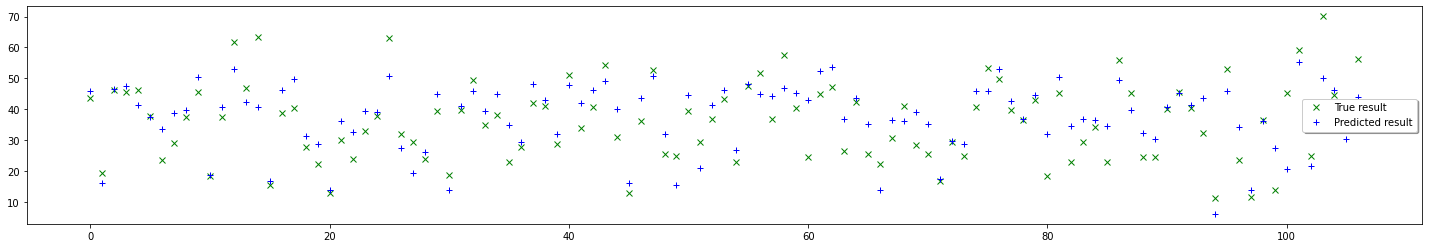

In [892]:


def show_accuracy_plot(estimator):
    plt.rcParams["figure.figsize"] = (25,4)
    plt.gca().axes.get_yaxis().set_visible(True)
    plt.plot(X_test.index, Y_test, "gx", label = "True result")
    plt.plot(X_test.index, estimator.predict(X_test), "b+", label = "Predicted result")
    plt.legend(loc="center right", shadow=True)
    plt.show()
    
show_accuracy_plot(linear_regression_model)

Some Other Plots

[[ -2.16323073]
 [  3.19348004]
 [ -0.55801357]
 [ -1.76857499]
 [  4.85753098]
 [  0.21657761]
 [-10.22200254]
 [ -9.7658749 ]
 [ -2.50647474]
 [ -4.88245481]]
<class 'numpy.ndarray'>


c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

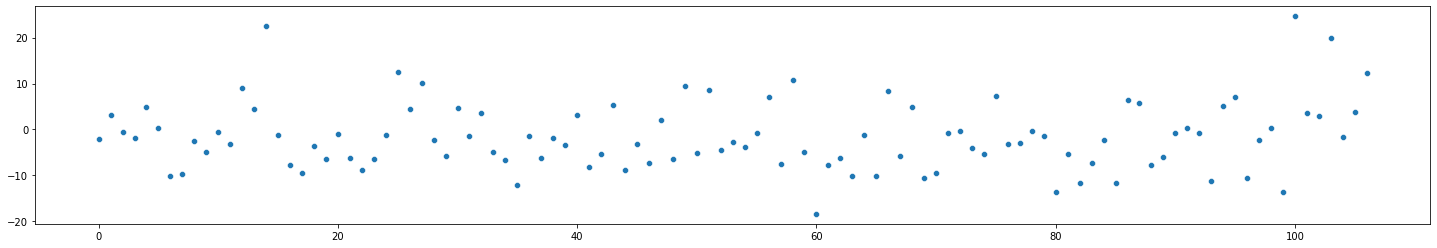

In [893]:
import seaborn as sns

# print(type(Y_test))
# print(Y_test[:10])

# print(type(prediction))
# print(prediction[:10])

residuals = Y_test-prediction
print(residuals[:10])
print(type(residuals))

arrrayed_residuals = residuals.reshape(-1)
sns.scatterplot(np.arange(arrrayed_residuals.shape[0]), arrrayed_residuals)

<AxesSubplot:ylabel='Density'>

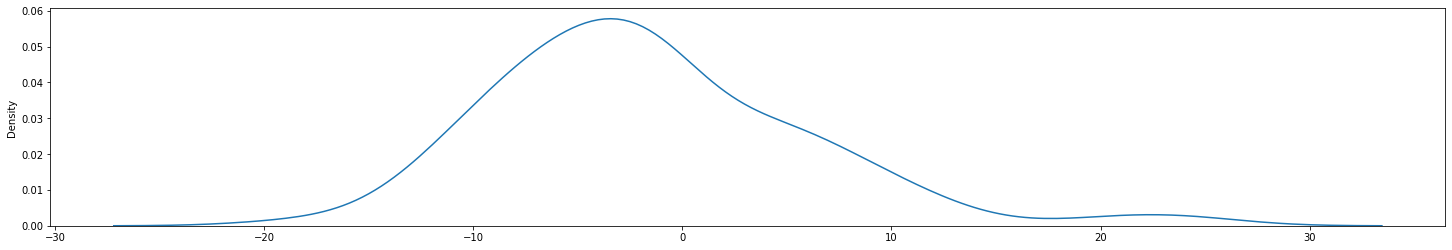

In [894]:
sns.kdeplot(arrrayed_residuals)